In [1]:
import pandas as pd
from collections import defaultdict
import helper_functions
from IPython.display import display
import statistics

In [2]:
# Variables
# Paths
trial_points = "mini_project_2_data/events_file_ordered.csv"
ecog_data = "mini_project_2_data/brain_data_channel_one.csv"

# Other variables
start_event_position = 0
finger_column_num = 2

Finger 1: len(time_points) = 1201, len(averages) = 1201
Finger 2: len(time_points) = 1201, len(averages) = 1201
Finger 3: len(time_points) = 1201, len(averages) = 1201
Finger 4: len(time_points) = 1201, len(averages) = 1201
Finger 5: len(time_points) = 1201, len(averages) = 1201


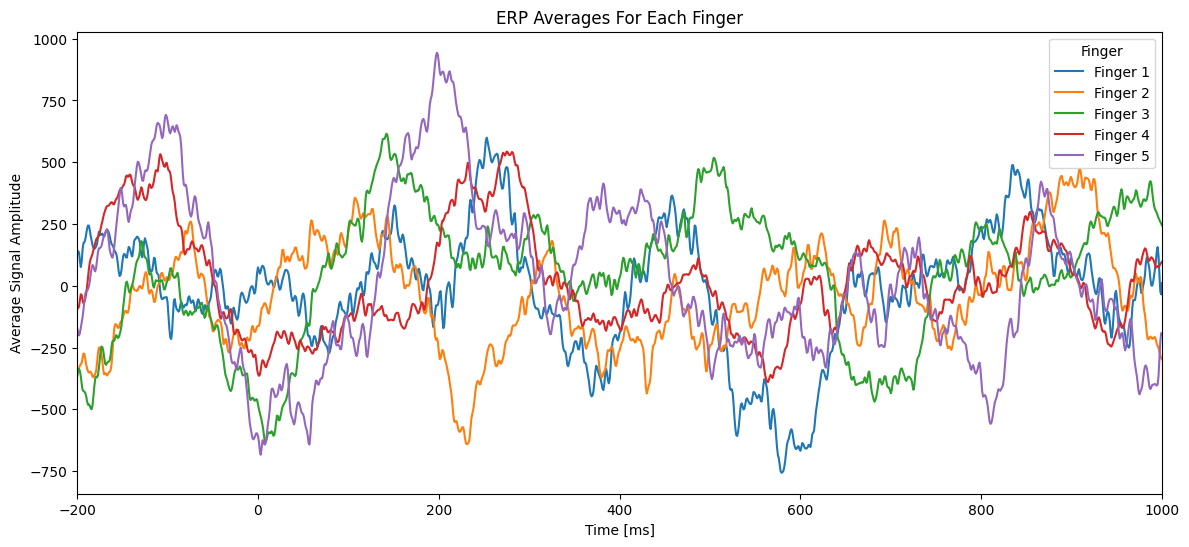

,0,1,2,3,4,5,6,7,8,9,...,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200
1,128.078125,140.179688,135.187500,101.851562,75.820312,97.250000,147.015625,173.390625,176.007812,188.000000,...,38.531250,65.179688,95.734375,136.234375,156.531250,120.414062,42.812500,-23.765625,-34.859375,11.070312
2,-345.361345,-342.798319,-333.630252,-323.084034,-317.974790,-311.294118,-293.008403,-273.924370,-275.781513,-296.924370,...,-208.747899,-207.613445,-218.100840,-234.462185,-243.378151,-252.436975,-267.579832,-281.789916,-293.697479,-298.008403
3,-367.991667,-346.641667,-336.325000,-344.958333,-365.325000,-396.366667,-421.033333,-426.291667,-428.466667,-434.325000,...,325.716667,309.966667,302.316667,295.416667,284.133333,273.916667,265.883333,258.375000,251.183333,243.250000
4,-89.542105,-91.615789,-84.073684,-58.947368,-34.610526,-37.057895,-58.847368,-71.147368,-65.352632,-50.894737,...,98.752632,87.463158,74.931579,74.200000,79.394737,79.300000,81.105263,87.200000,93.636842,97.531579
5,-171.594595,-185.486486,-201.135135,-192.472973,-170.932432,-151.108108,-126.689189,-96.783784,-61.797297,-32.175676,...,-399.878378,-397.675676,-399.310811,-404.148649,-400.108108,-364.783784,-294.054054,-222.864865,-191.216216,-193.040541


In [6]:
# Function


def calc_mean_erp(trial_points, ecog_data):
    # 3 colums: starting point of every movement, the peak of every movement and the number finger 
    finger_movement = pd.read_csv(trial_points)
    finger_movement.columns = ['start', 'peak', 'finger']
    electrode_data = pd.read_csv(ecog_data)
    electrode_data.columns = ['signal']

    # Validate the trial_points
    finger_movement = helper_functions.validate_ints_df(finger_movement)

    # Store for each finger lists of each milisecond from events
    finger_dict = {finger: defaultdict(list) for finger in range(1, 6)}

    # Go through trial_points and append to the dict the slices from ecogdata
    for _, row in finger_movement.iterrows():
        finger = row['finger']
        start = row['start'] - 200 
        end = row['start'] + 1000

        if start >= 0 and end < len(electrode_data):
            signal_slice = list(electrode_data.loc[start:end, 'signal']) 
            for i,signal in enumerate(signal_slice):
                finger_dict[finger][i].append(signal)
        else:
            print(f"Skipping invalid range for finger {finger}: start={start}, end={end}")
    

    averages = defaultdict(list)
    # Calculate the means
    for finger in finger_dict:
        for milisecond in finger_dict[finger]:
            averages[finger].append(statistics.mean(finger_dict[finger][milisecond]))
    
    df = pd.DataFrame(averages)
    
    helper_functions.plot_averages(df)

    return df.T


fingers_erp_mean = calc_mean_erp(trial_points, ecog_data) 
display(fingers_erp_mean)